In [50]:
import mplconfig
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [133]:
colors, linestyles, markers = mplconfig.styles(9)
colors, markers

9 <type 'int'> <matplotlib.colors.ListedColormap object at 0x7f7439fb6050>


([u'#1b9e77',
  u'#d95f02',
  u'#7570b3',
  u'#e7298a',
  u'#66a61e',
  u'#e6ab02',
  u'#a6761d',
  u'#666666',
  u'#666666'],
 ['o', '^', 's', '+', '*', 'D', 'v', '1', '2'])

In [52]:
mplconfig.color_grad(10)

array([[ 0.10588235,  0.61960784,  0.46666667,  1.        ],
       [ 0.10588235,  0.61960784,  0.46666667,  1.        ],
       [ 0.85098039,  0.37254902,  0.00784314,  1.        ],
       [ 0.45882353,  0.43921569,  0.70196078,  1.        ],
       [ 0.90588235,  0.16078431,  0.54117647,  1.        ],
       [ 0.4       ,  0.65098039,  0.11764706,  1.        ],
       [ 0.90196078,  0.67058824,  0.00784314,  1.        ],
       [ 0.65098039,  0.4627451 ,  0.11372549,  1.        ],
       [ 0.4       ,  0.4       ,  0.4       ,  1.        ],
       [ 0.4       ,  0.4       ,  0.4       ,  1.        ]])

In [53]:
plt.figure(figsize=(9,6))

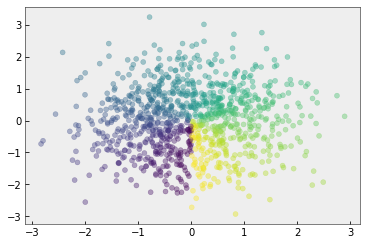

In [54]:
n=1000
#rand 均匀分布和 randn高斯分布
x=np.random.randn(1,n)
y=np.random.randn(1,n)
T=np.arctan2(x,y)
plt.scatter(x,y,c=T,s=25,alpha=0.4,marker='o')
#T:散点的颜色
#s：散点的大小
#alpha:是透明程度

In [55]:
import pandas as pd

In [78]:
b = pd.read_csv("libsci/rblib/rblib/test.txt", sep=" ")
b

,1,2,pc1,pc2,pc3
0,UV0_G1,UV0,0.069251,0.657449,-0.394667
1,UV0_G2,UV0,0.144299,-0.587079,-0.357019
2,UV0_G3,UV0,0.167698,-0.292073,0.229556
3,UV1_G1,UV1,0.149200,0.206391,0.007669
4,UV2_G1,UV2,-0.930046,-0.047973,0.062307
5,UV3_G1,UV3,0.104568,0.069974,-0.335302
6,UV3_G2,UV3,0.138302,-0.213745,0.047380
7,UV3_G3,UV3,0.170150,0.205696,0.738557


In [88]:
aa = b.set_index(['2'])
aa.loc['UV0', :]
aa.index, aa.loc['UV0',:]

(Index([u'UV0', u'UV0', u'UV0', u'UV1', u'UV2', u'UV3', u'UV3', u'UV3'], dtype='object', name=u'2'),
           1       pc1       pc2       pc3
 2                                        
 UV0  UV0_G1  0.069251  0.657449 -0.394667
 UV0  UV0_G2  0.144299 -0.587079 -0.357019
 UV0  UV0_G3  0.167698 -0.292073  0.229556)

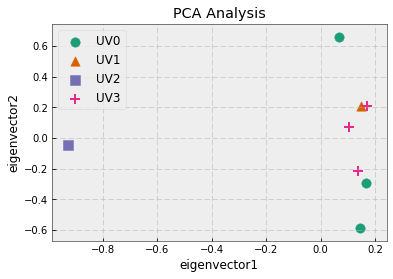

In [131]:
fig, ax = plt.subplots()
group = list(set(aa.index))

for i in range(len(group)):
    ax.scatter(x=aa.loc[group[i], 'pc1'], s=plt.rcParams['lines.markersize'] ** 2.5,y=aa.loc[group[i], 'pc2'], c = colors[i], marker=markers[i], label=group[i])

# tidy up the figure
ax.grid(True)
ax.legend(loc='best')
ax.set_title('PCA Analysis')
ax.set_xlabel('eigenvector1')
ax.set_ylabel('eigenvector2')


In [143]:
fig.savefig("aa.svg", format="svg")

In [144]:
import itertools
help(itertools)

Help on built-in module itertools:

NAME
    itertools - Functional tools for creating and using iterators.

FILE
    (built-in)

DESCRIPTION
    Infinite iterators:
    count([n]) --> n, n+1, n+2, ...
    cycle(p) --> p0, p1, ... plast, p0, p1, ...
    repeat(elem [,n]) --> elem, elem, elem, ... endlessly or up to n times
    
    Iterators terminating on the shortest input sequence:
    chain(p, q, ...) --> p0, p1, ... plast, q0, q1, ... 
    compress(data, selectors) --> (d[0] if s[0]), (d[1] if s[1]), ...
    dropwhile(pred, seq) --> seq[n], seq[n+1], starting when pred fails
    groupby(iterable[, keyfunc]) --> sub-iterators grouped by value of keyfunc(v)
    ifilter(pred, seq) --> elements of seq where pred(elem) is True
    ifilterfalse(pred, seq) --> elements of seq where pred(elem) is False
    islice(seq, [start,] stop [, step]) --> elements from
           seq[start:stop:step]
    imap(fun, p, q, ...) --> fun(p0, q0), fun(p1, q1), ...
    starmap(fun, seq) --> fun(*seq[0]), 

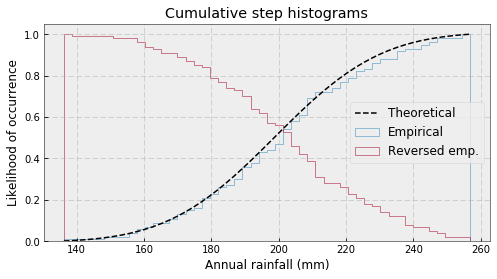

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import mlab

np.random.seed(0)

mu = 200
sigma = 25
n_bins = 50
x = np.random.normal(mu, sigma, size=100)

fig, ax = plt.subplots(figsize=(8, 4))

# plot the cumulative histogram
n, bins, patches = ax.hist(x, n_bins, normed=1, histtype='step',
                           cumulative=True, label='Empirical')

# Add a line showing the expected distribution.
y = mlab.normpdf(bins, mu, sigma).cumsum()
y /= y[-1]

ax.plot(bins, y, 'k--', linewidth=1.5, label='Theoretical')

# Overlay a reversed cumulative histogram.
ax.hist(x, bins=bins, normed=1, histtype='step', cumulative=-1,
        label='Reversed emp.')

# tidy up the figure
ax.grid(True)
ax.legend(loc='right')
ax.set_title('Cumulative step histograms')
ax.set_xlabel('Annual rainfall (mm)')
ax.set_ylabel('Likelihood of occurrence')